# Sentimental Analysis on Google News (Amazon)





Importing libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Installing GoogleNews

In [34]:
!pip install GoogleNews

In [35]:
from GoogleNews import GoogleNews
googlenews = GoogleNews()
googlenews.set_lang('en')

Selecting News on "**Amazon**"

In [36]:
#Get last 6 years Amazon's google news
googlenews.get_news('Amazon')  
googlenews.set_time_range('01/01/2016','11/18/2021')

News Results: 

In [37]:
results=googlenews.results()
results

[{'date': '14 hours ago',
  'datetime': datetime.datetime(2021, 11, 17, 16, 6, 34, 508900),
  'desc': 'Opinion',
  'img': 'https://lh3.googleusercontent.com/proxy/6rud-c8DdcsBI3W-kTwKqk6NODgrpcdR-VJYXB9ZVxPeXB6-hCtZ3Av3q-YDQaXDS5kJHdHmNsKr-cjUpkxV108OEw2oNS-1fH_H4S4s6pSATQJYvJ1yCbwRhJt93OO4kLDWaW7ag7C4A28hHi7lCTxygyc4iSnqn0p722sb0UO2UbgNidSPhlUfbhx0nwQsuqYFiiflqlQkWipT=s0-w100-h100-dcKVSSraEI',
  'link': 'news.google.com/./articles/CBMiXWh0dHBzOi8vd3d3LmNubi5jb20vMjAyMS8xMS8xNy9jbm4tdW5kZXJzY29yZWQvYmVzdC1hbWF6b24tcHJvZHVjdHMtYmlnLWRpZmZlcmVuY2UvaW5kZXguaHRtbNIBYWh0dHBzOi8vYW1wLmNubi5jb20vY25uLzIwMjEvMTEvMTcvY25uLXVuZGVyc2NvcmVkL2Jlc3QtYW1hem9uLXByb2R1Y3RzLWJpZy1kaWZmZXJlbmNlL2luZGV4Lmh0bWw?hl=en-US&gl=US&ceid=US%3Aen',
  'media': None,
  'site': 'CNN',
  'title': '44 little things you can buy on Amazon that make a big difference'},
 {'date': '12 hours ago',
  'datetime': datetime.datetime(2021, 11, 17, 18, 6, 34, 509644),
  'desc': 'bookmark_border',
  'img': 'https://lh3.googleuserco

Getting News headlines

In [38]:
headlines=googlenews.get_texts()
headlines

['44 little things you can buy on Amazon that make a big difference',
 'Amazon Fire TV Omni review: useful Alexa features, underwhelming picture',
 'Amazon’s early Black Friday deals: TVs, wireless earbuds, and more',
 "Shop Kyle Richards and Kathy Hilton's Amazon Holiday Gift-Guide | PEOPLE.com",
 'India high court orders competition regulator to expedite Amazon-Future decision',
 'Shop the Shark Air Purifier for Its Lowest Price Ever at Amazon | PEOPLE.com',
 'Deals: AirTag 4-Pack Drops to $87.99 for Amazon Prime Members',
 'Amazon Cloud CEO Tweaks Strategy Amid Microsoft, Google Rivalry',
 'Amazon Opens Conklin Distribution Center in Middle of the Night',
 'The Isiler Portable Space Heater Is 27% Off at Amazon',
 'Photos: Inside the Amazon HQ2 Construction Zone',
 "Amazon unveils 'curbside recyclable' grocery delivery packaging",
 'Psst, You Can Get The Amazon Fire TV Stick For Just $25 Right Now',
 'Amazon’s ridiculously large Echo Show 15 arrives December 9',
 "Cincinnati to soon 

In [39]:
columns = [ 'Headline']
NewsHeadlines = pd.DataFrame(headlines, columns=columns)
NewsHeadlines

,Headline
0,44 little things you can buy on Amazon that ma...
1,Amazon Fire TV Omni review: useful Alexa featu...
2,"Amazon’s early Black Friday deals: TVs, wirele..."
3,Shop Kyle Richards and Kathy Hilton's Amazon H...
4,India high court orders competition regulator ...
...,...
93,'Amazon Unbound' Explores The Rise Of Jeff Bez...
94,Microsoft and Amazon reach truce allowing form...
95,Deals: Amazon Discounts 32GB Apple TV 4K to Ma...
96,What it's really like to be an Amazon warehous...


Removing Stop words form the headlines

In [40]:
## remove stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
NewsHeadlines['Headline'] = NewsHeadlines['Headline'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
NewsHeadlines['Headline'][2]

'Amazon’s early Black Friday deals: TVs, wireless earbuds,'

removing Punctuations:

In [41]:
## remove punctuation
NewsHeadlines['Headline'] = NewsHeadlines['Headline'].str.replace('[^\w\s]','')

In [42]:
most = pd.Series(' '.join(NewsHeadlines['Headline']).split()).value_counts()[:10]
most

Amazon     78
The        13
Amazons    10
Prime       9
Deals       8
Off         6
Apple       6
Is          6
Friday      5
This        5
dtype: int64

In [43]:
most = list(most.index)
NewsHeadlines['Headline'] = NewsHeadlines['Headline'].apply(lambda x: " ".join(x for x in x.split() if x not in most))
NewsHeadlines['Headline'].head()

0             44 little things buy make big difference
1    Fire TV Omni review useful Alexa features unde...
2               early Black deals TVs wireless earbuds
3    Shop Kyle Richards Kathy Hiltons Holiday GiftG...
4    India high court orders competition regulator ...
Name: Headline, dtype: object

In [44]:
from textblob import TextBlob
TextBlob(NewsHeadlines['Headline'][1]).words

WordList(['Fire', 'TV', 'Omni', 'review', 'useful', 'Alexa', 'features', 'underwhelming', 'picture'])

In [45]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
NewsHeadlines['Headline'] = NewsHeadlines['Headline'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [46]:
NewsHeadlines['Headline'][4]

'india high court order competit regul expedit amazonfutur decis'

wordcoud

In [47]:


from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

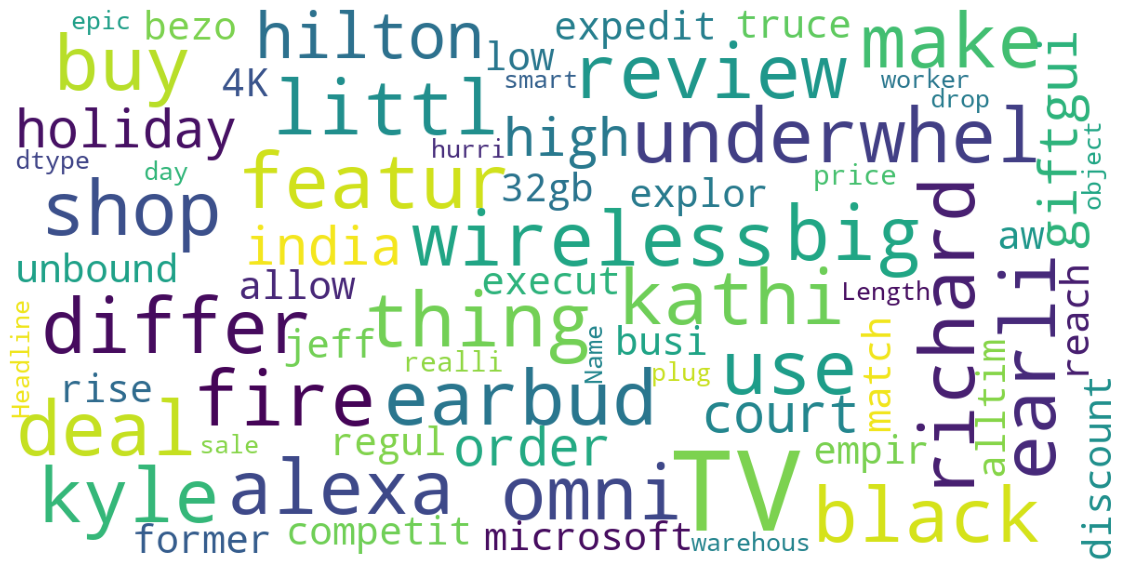

In [48]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=800,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=24)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(NewsHeadlines['Headline'])

Importing Sentiment Analyzer

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [50]:
analyzer = SentimentIntensityAnalyzer()

In [51]:
# Use polarity_scores method of Sentiment Intensity Analyzer to get sentiment scores
sentiment_scores = NewsHeadlines['Headline'].apply(analyzer.polarity_scores).tolist() # results contains pos, neg, neu, and compound scores.

Sentiment Scores:

In [52]:
sentiment_scores = pd.DataFrame(sentiment_scores)
print("Overall sentiment dictionary is :\n  ")
print(sentiment_scores)

Overall sentiment dictionary is :
  
      neg    neu    pos  compound
0   0.000  1.000  0.000    0.0000
1   0.231  0.769  0.000   -0.3400
2   0.000  1.000  0.000    0.0000
3   0.000  0.722  0.278    0.4019
4   0.000  1.000  0.000    0.0000
..    ...    ...    ...       ...
93  0.000  1.000  0.000    0.0000
94  0.000  0.769  0.231    0.2500
95  0.189  0.811  0.000   -0.2732
96  0.000  0.667  0.333    0.3612
97  0.194  0.556  0.250    0.1531

[98 rows x 4 columns]


In [53]:
sentiment_value=[] 
 # decide sentiment as positive, negative and neutral
for i in  sentiment_scores['compound']:
   
    if  i >= 0.05  :
        sentiment_value.append( "Positive")
 
    elif i  <= - 0.05 :
        sentiment_value.append( "Negative")
 
    else :
        sentiment_value.append("Neutral")

In [54]:
NewsHeadlines['Sentiment value']=(sentiment_value)
NewsHeadlines

,Headline,Sentiment value
0,44 littl thing buy make big differ,Neutral
1,fire TV omni review use alexa featur underwhel...,Negative
2,earli black deal tv wireless earbud,Neutral
3,shop kyle richard kathi hilton holiday giftgui...,Positive
4,india high court order competit regul expedit ...,Neutral
...,...,...
93,unbound explor rise Of jeff bezo busi empir,Neutral
94,microsoft reach truce allow former aw execut c...,Positive
95,discount 32gb TV 4K match alltim low price 159...,Negative
96,what realli like warehous worker day,Positive
